In [1]:
import os
import sys
import pandas as pd

In [2]:
sys.path.append("/Users/ueki/.pyenv/versions/3.7.3/lib/python3.7/site-packages/")

# Chapter7 単語ベクトル

## 60 単語ベクトルの埋め込みと表示

In [0]:
base_dir ="drive/My Drive/chap07/".replace("/",os.sep)

In [0]:
DATA_FILE =base_dir+"data/GoogleNews-vectors-negative300.bin.gz"

In [0]:
from gensim.models import KeyedVectors
data = KeyedVectors.load_word2vec_format(base_dir+'data/GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#data["United_States"]

## 61 単語の類似度

In [0]:
data.similarity("United_States","U.S.")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.73107743

## 62 類似度の高い単語10件

In [0]:
top10=data.most_similar(positive="United_States", negative=None, topn=10)
for i,v in enumerate(top10):
    word,score = v
    print("{}:word:{}\tscore{}".format(i+1,word,score))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1:word:Unites_States	score0.7877248525619507
2:word:Untied_States	score0.7541370391845703
3:word:United_Sates	score0.74007248878479
4:word:U.S.	score0.7310774326324463
5:word:theUnited_States	score0.6404393911361694
6:word:America	score0.6178410053253174
7:word:UnitedStates	score0.6167312264442444
8:word:Europe	score0.6132988929748535
9:word:countries	score0.6044804453849792
10:word:Canada	score0.6019070148468018


## 63 　加法構成性によるアナロジー

In [0]:
top10=data.most_similar(positive=["Spain","Athens"], negative=["Madrid"], topn=10)
for i,v in enumerate(top10):
    word,score = v
    print("{}:word:{}\tscore{}".format(i+1,word,score))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1:word:Greece	score0.6898481249809265
2:word:Aristeidis_Grigoriadis	score0.5606848001480103
3:word:Ioannis_Drymonakos	score0.5552908778190613
4:word:Greeks	score0.545068621635437
5:word:Ioannis_Christou	score0.5400862693786621
6:word:Hrysopiyi_Devetzi	score0.5248444676399231
7:word:Heraklio	score0.5207759737968445
8:word:Athens_Greece	score0.516880989074707
9:word:Lithuania	score0.5166866183280945
10:word:Iraklion	score0.5146791934967041


## 64 アナロジーデータでの実験

In [0]:
FILE = "/data/questions-words.txt"
OUT_FILE="/data/questions-words2.txt"

In [0]:
with open(base_dir+FILE) as f:
    cnt=0
    for line in f:
        cnt +=1
    print(cnt)

19558


In [0]:
cnt=0
with open(base_dir+FILE) as f:
    with open(base_dir+OUT_FILE,mode="w") as f_out:
        for line in f:
            cnt+=1
            items = line.split()
            if len(items)!=4:#column名の説明の行はskipする
                f_out.write(" ".join(map(str,items))+"\n")
                continue
            top=data.most_similar(positive=[items[1],items[2]], negative=[items[0]], topn=1)
            f_out.write(" ".join(map(str,items))+" "+str(top[0][0])+" "+str(top[0][1])+"\n")
            if cnt%100==0:
                print("------{}------".format(cnt))
                                                        

## 65 アナロジータスクでの正解率

In [0]:
acc=0
cnt=0
with open(base_dir+OUT_FILE) as f:
    for line in f:
        items = line.split()
        if len(items)!=6:#column名の説明をしてる行はskipする
            continue
        else:
            cnt += 1
            if items[3]==items[4]:
                acc+=1
acc/cnt
        

0.7358780188293083

## 66 WordSimilarity-353での評価

In [0]:
WORDSIM_FILE="/data/wordsim353/combined.csv"

In [0]:
human_val=[]
word2vec_val=[]
first=True
with open(base_dir+WORDSIM_FILE) as f:
    for line in f:
        if first:
            first=False
            continue
        items = line.split(",")       
        word1=items[0]
        word2=items[1]
        h_val = items[2]
        w_val = data.similarity(word1,word2)         
        human_val.append(float(h_val))
        word2vec_val.append(float(w_val))   

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from scipy.stats import spearmanr

In [0]:
cor = spearmanr(human_val,word2vec_val)

In [0]:
cor

SpearmanrResult(correlation=0.7000166486272194, pvalue=2.86866666051422e-53)

## 67 k-means クラスタリング

### 国名の抽出
* questrin-wordに乗ってる国名を取ってくる

In [0]:
countries=set()
cnt=0
with open(base_dir+OUT_FILE) as f:
    for line in f:
        items = line.split()
        if len(items)==6:
            countries.add(items[1])
            countries.add(items[3])
        else:
            cnt+=1
            if cnt==3:    
                break
            print(line)
countries=list(countries)

: capital-common-countries

: capital-world



In [0]:
len(countries)

116

### word Vector の用意

In [0]:
word_vec=[]
for c in countries:
    word_vec.append(data[c])

### k means clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
NUM=5 #cluster数

In [0]:
k_means = KMeans(n_clusters=NUM)
idx = k_means.fit_predict(word_vec)

In [0]:
clusters=[]
for cluster in range(NUM):
    print("cluster {}".format(cluster+1))
    words=[]
    for i in range(len(idx)):
        if cluster == idx[i]:
            words.append(countries[i])
    print("\t".join(words))
    clusters.append(words)

cluster 1
Dominica	Bahamas	Fiji	Jamaica	Chile	Guyana	Samoa	Philippines	Uruguay	Honduras	Peru	Ecuador	Suriname	Cuba	Venezuela	Belize	Nicaragua	Tuvalu	Australia	Canada	Taiwan
cluster 2
Namibia	Burundi	Sudan	Uganda	Gabon	Mali	Rwanda	Ghana	Malawi	Mozambique	Angola	Senegal	Gambia	Mauritania	Liberia	Zambia	Zimbabwe	Madagascar	Niger	Botswana	Guinea	Tunisia	Eritrea	Kenya	Algeria	Nigeria
cluster 3
Vietnam	Bangladesh	Laos	China	Libya	Morocco	Pakistan	Iraq	Somalia	Afghanistan	Thailand	Syria	Bahrain	Indonesia	Bhutan	Japan	Iran	Jordan	Egypt	Lebanon	Qatar	Oman	Nepal
cluster 4
Kazakhstan	Russia	Uzbekistan	Ukraine	Belarus	Tajikistan	Turkmenistan	Armenia	Kyrgyzstan	Moldova	Azerbaijan
cluster 5
Lithuania	Latvia	Estonia	Greece	Poland	Malta	Albania	Germany	Serbia	Norway	Finland	Ireland	Spain	Georgia	Bulgaria	Portugal	Greenland	Liechtenstein	Hungary	England	Macedonia	Slovakia	Austria	Denmark	Montenegro	Switzerland	Turkey	Sweden	Slovenia	Italy	France	Belgium	Romania	Cyprus	Croatia


### visualizing cluster

In [2]:
! pip install pygal_maps_world

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from pygal_maps_world.maps import World

In [0]:
wm = World()

In [0]:
wm.title="Cluster res"

In [0]:
# world mapを使うときに国名は、省略した形で使う。それを行うdictを作る.(ex. japan->jp見たいな))
cnt_to_code=dict()
with open(base_dir+"data/country.txt") as f:
    for line in f:
        item = line.split()
        cnt_to_code[item[1]]=item[0]

In [0]:
for i,cl in enumerate(clusters):
    c_code=[]
    for c in cl:
        try:
            c_code.append(cnt_to_code[c])
        except KeyError: # world mapにない国名もあるので、error処理
            print("not found name:{}".format(c))
            pass
        
    wm.add("{} Cluster".format(i+1),c_code) # クラスタごとに国のリストを追加(同じクラスタの国は同じ色で塗られるようになる)
    

not found name:Bahamas
not found name:Fiji
not found name:Samoa
not found name:Tuvalu
not found name:Libya
not found name:Qatar
not found name:England


In [5]:
from IPython.display import SVG, display

In [11]:
#SVG(wm.render())

In [20]:
! ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


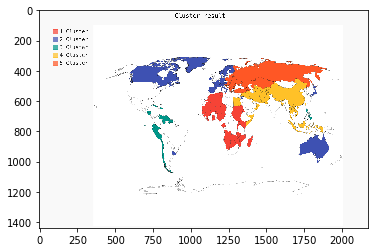

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#Jupyterでインライン表示するための宣言
%matplotlib inline
#画像の読み込み
im = Image.open("./cluster.png")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

## 68 Ward法によるクラスタリング

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
import matplotlib.pyplot as plt

In [0]:
z = linkage(word_vec,method="ward",)

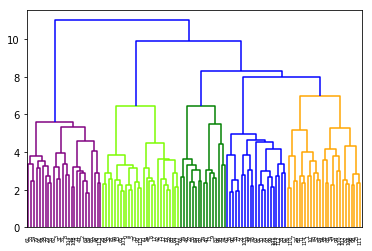

In [0]:
set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange']) # 5クラスタまでの色を指定
_=dendrogram(z,labels=None)

##  69 t-SNEによる可視化

In [0]:
from sklearn.manifold import TSNE
import seaborn as sns

In [0]:
model = TSNE(n_components=2, random_state=0)#n_component= dim

In [0]:
model.fit(word_vec) 

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

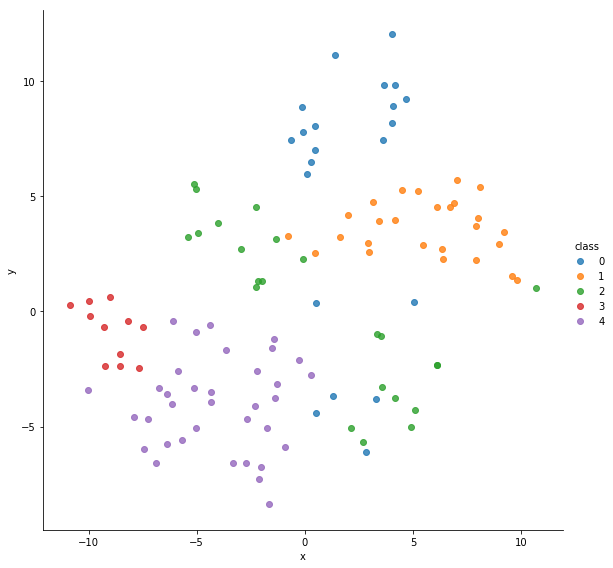

In [0]:
df = pd.DataFrame(model.embedding_[:,0],columns=["x"])
df['y'] = pd.DataFrame(model.embedding_[:,1])
df["class"] = idx
graph = sns.lmplot(
    data=df,x="x",y="y",hue="class",fit_reg=False,height=8)